# **Simple Autoencoder**

In [ ]:
# import all the dependencies
from keras.layers import Dense,Conv2D,MaxPooling2D,UpSampling2D
from keras import Input, Model
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
encoding_dim = 15 
input_img = Input(shape=(784,))
# encoded representation of input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# decoded representation of code 
decoded = Dense(784, activation='sigmoid')(encoded)
# Model which take input image and shows decoded images
autoencoder = Model(input_img, decoded)

In [ ]:
# This model shows encoded images
encoder = Model(input_img, encoded)
# Creating a decoder model
encoded_input = Input(shape=(encoding_dim,))
# last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 784)
(10000, 784)


In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=15,
                batch_size=256,
                validation_data=(x_test, x_test))

Epoch 1/15
235/235 [==============================] - 2s 8ms/step - loss: 0.3122 - val_loss: 0.2206
Epoch 2/15
235/235 [==============================] - 2s 7ms/step - loss: 0.2002 - val_loss: 0.1849
Epoch 3/15
235/235 [==============================] - 2s 7ms/step - loss: 0.1765 - val_loss: 0.1660
Epoch 4/15
235/235 [==============================] - 2s 7ms/step - loss: 0.1617 - val_loss: 0.1555
Epoch 5/15
235/235 [==============================] - 2s 7ms/step - loss: 0.1535 - val_loss: 0.1489
Epoch 6/15
235/235 [==============================] - 2s 7ms/step - loss: 0.1481 - val_loss: 0.1449
Epoch 7/15
235/235 [==============================] - 2s 7ms/step - loss: 0.1448 - val_loss: 0.1426
Epoch 8/15
235/235 [==============================] - 2s 7ms/step - loss: 0.1426 - val_loss: 0.1405
Epoch 9/15
235/235 [==============================] - 2s 7ms/step - loss: 0.1408 - val_loss: 0.1389
Epoch 10/15
235/235 [==============================] - 2s 7ms/step - loss: 0.1392 - val_loss: 0.1374

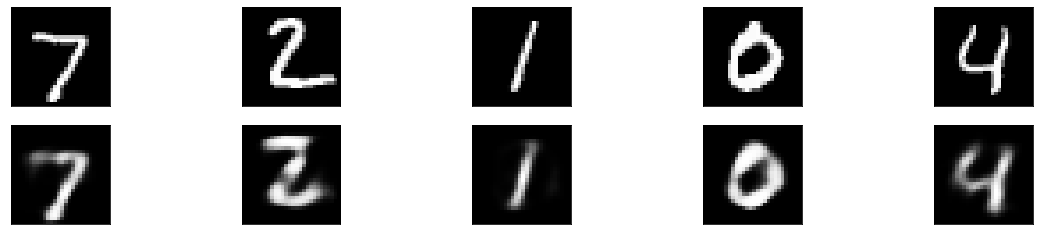

In [ ]:
encoded_img = encoder.predict(x_test)
decoded_img = decoder.predict(encoded_img)
plt.figure(figsize=(20, 4))
for i in range(5):
    # Display original
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # Display reconstruction
    ax = plt.subplot(2, 5, i + 1 + 5)
    plt.imshow(decoded_img[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
from keras.models import Sequential
model = Sequential()
# encoder network
model.add(Conv2D(30, 3, activation= 'relu', padding='same', input_shape = (28,28,1)))
model.add(MaxPooling2D(2, padding= 'same'))
model.add(Conv2D(15, 3, activation= 'relu', padding='same'))
model.add(MaxPooling2D(2, padding= 'same'))
#decoder network
model.add(Conv2D(15, 3, activation= 'relu', padding='same'))
model.add(UpSampling2D(2))
model.add(Conv2D(30, 3, activation= 'relu', padding='same'))
model.add(UpSampling2D(2))
model.add(Conv2D(1,3,activation='sigmoid', padding= 'same')) # output layer
model.compile(optimizer= 'adam', loss = 'binary_crossentropy')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 30)        300       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 30)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 15)        4065      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 15)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 15)          2040      
                                                                 
 up_sampling2d (UpSampling2D  (None, 14, 14, 15)       0

In [ ]:
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))
model.fit(x_train, x_train,
                epochs=15,
                batch_size=128,
                validation_data=(x_test, x_test))

Epoch 1/15
469/469 [==============================] - 91s 193ms/step - loss: 0.1339 - val_loss: 0.0819
Epoch 2/15
469/469 [==============================] - 87s 185ms/step - loss: 0.0793 - val_loss: 0.0760
Epoch 3/15
469/469 [==============================] - 86s 184ms/step - loss: 0.0753 - val_loss: 0.0734
Epoch 4/15
469/469 [==============================] - 86s 183ms/step - loss: 0.0733 - val_loss: 0.0719
Epoch 5/15
469/469 [==============================] - 87s 185ms/step - loss: 0.0721 - val_loss: 0.0709
Epoch 6/15
469/469 [==============================] - 87s 186ms/step - loss: 0.0711 - val_loss: 0.0701
Epoch 7/15
469/469 [==============================] - 87s 185ms/step - loss: 0.0704 - val_loss: 0.0695
Epoch 8/15
469/469 [==============================] - 87s 185ms/step - loss: 0.0699 - val_loss: 0.0691
Epoch 9/15
469/469 [==============================] - 87s 185ms/step - loss: 0.0695 - val_loss: 0.0687
Epoch 10/15
469/469 [==============================] - 87s 185ms/step - l

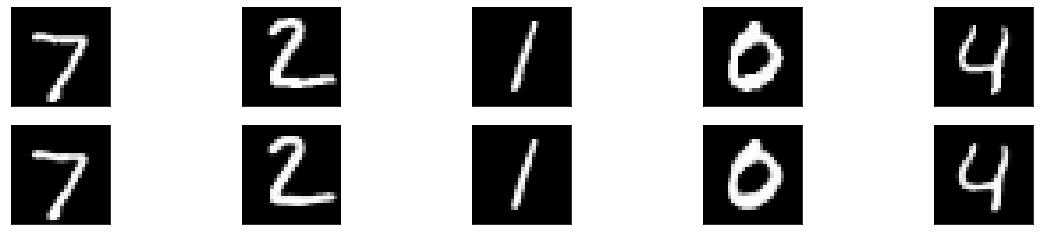

In [ ]:
pred = model.predict(x_test)
plt.figure(figsize=(20, 4))
for i in range(5):
    # Display original
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # Display reconstruction
    ax = plt.subplot(2, 5, i + 1 + 5)
    plt.imshow(pred[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

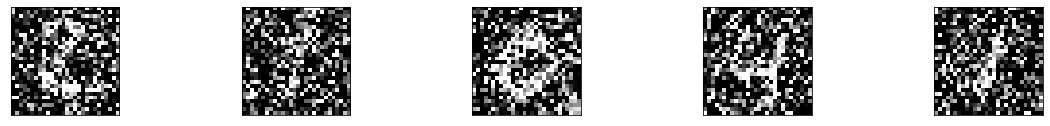

In [ ]:
noise_factor = 0.7
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)
#Here is how the noisy images look right now.
plt.figure(figsize=(20, 2))
for i in range(1, 5 + 1):
    ax = plt.subplot(1, 5, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
model = Sequential()
# encoder network
model.add(Conv2D(35, 3, activation= 'relu', padding='same', input_shape = (28,28,1)))
model.add(MaxPooling2D(2, padding= 'same'))
model.add(Conv2D(25, 3, activation= 'relu', padding='same'))
model.add(MaxPooling2D(2, padding= 'same'))
#decoder network
model.add(Conv2D(25, 3, activation= 'relu', padding='same'))
model.add(UpSampling2D(2))
model.add(Conv2D(35, 3, activation= 'relu', padding='same'))
model.add(UpSampling2D(2))
model.add(Conv2D(1,3,activation='sigmoid', padding= 'same')) # output layer
model.compile(optimizer= 'adam', loss = 'binary_crossentropy')
model.fit(x_train_noisy, x_train,
                epochs=15,
                batch_size=128,
                validation_data=(x_test_noisy, x_test))

Epoch 1/15
469/469 [==============================] - 107s 227ms/step - loss: 0.1989 - val_loss: 0.1477
Epoch 2/15
469/469 [==============================] - 107s 228ms/step - loss: 0.1440 - val_loss: 0.1390
Epoch 3/15
469/469 [==============================] - 107s 228ms/step - loss: 0.1378 - val_loss: 0.1341
Epoch 4/15
469/469 [==============================] - 107s 228ms/step - loss: 0.1338 - val_loss: 0.1311
Epoch 5/15
469/469 [==============================] - 107s 228ms/step - loss: 0.1310 - val_loss: 0.1290
Epoch 6/15
469/469 [==============================] - 107s 228ms/step - loss: 0.1291 - val_loss: 0.1272
Epoch 7/15
469/469 [==============================] - 107s 228ms/step - loss: 0.1278 - val_loss: 0.1265
Epoch 8/15
469/469 [==============================] - 107s 227ms/step - loss: 0.1266 - val_loss: 0.1254
Epoch 9/15
469/469 [==============================] - 107s 228ms/step - loss: 0.1258 - val_loss: 0.1250
Epoch 10/15
469/469 [==============================] - 107s 228m

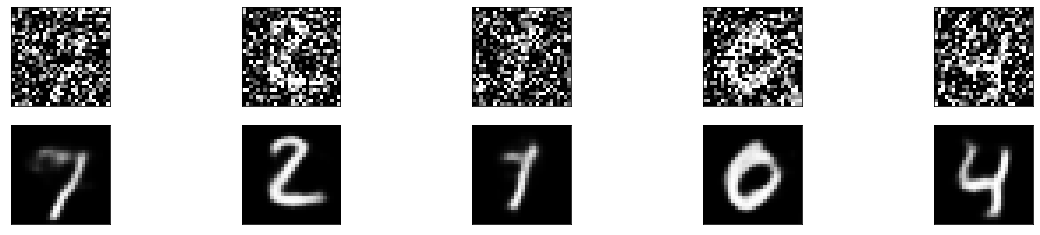

In [ ]:
pred = model.predict(x_test_noisy)
plt.figure(figsize=(20, 4))
for i in range(5):
    # Display original
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # Display reconstruction
    ax = plt.subplot(2, 5, i + 1 + 5)
    plt.imshow(pred[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()